<a href="https://colab.research.google.com/github/Nongbon/Bitcoin_Forecast/blob/main/Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import Sequential
from keras.models import load_model
from keras.layers import Dense, SimpleRNN
from keras import optimizers
from keras import layers
from keras import models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import math
import tensorflow as tf
from tensorflow import keras
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
data = pd.read_csv('Bitcoin.csv').drop(['Currency'],axis=1)
data.head()


,Date,Open,High,Low,Close,Volume,Market Cap
0,4/12/2013,1077.58,1156.12,1070.16,1151.17,0,1.390343e+10
1,5/12/2013,1152.73,1154.36,897.11,1045.11,0,1.262691e+10
2,6/12/2013,1042.38,1042.38,829.45,829.45,0,1.002565e+10
3,7/12/2013,835.32,854.64,640.22,698.23,0,8.442962e+09
4,8/12/2013,697.31,802.51,670.88,795.87,0,9.627500e+09


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2192 non-null   object 
 1   Open        2192 non-null   float64
 2   High        2192 non-null   float64
 3   Low         2192 non-null   float64
 4   Close       2192 non-null   float64
 5   Volume      2192 non-null   int64  
 6   Market Cap  2192 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 120.0+ KB


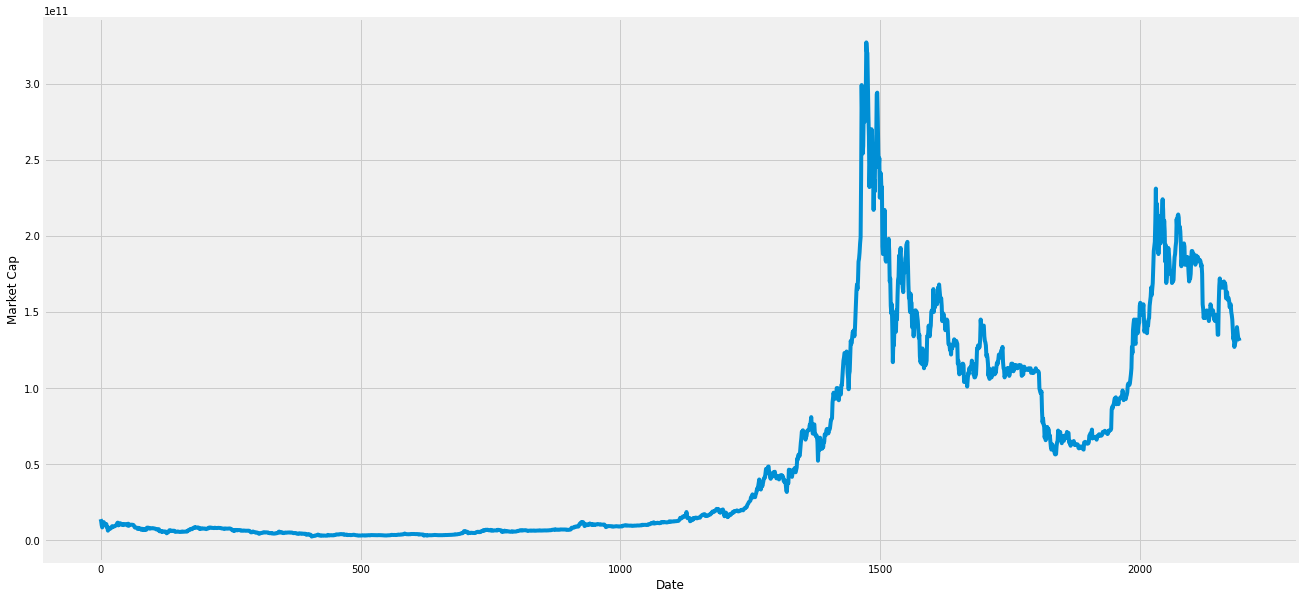

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(data['Market Cap'])
plt.xlabel('Date')
plt.ylabel('Market Cap')
plt.show()

In [ ]:
data.corr()['Market Cap']

Open          0.997007
High          0.997908
Low           0.998671
Close         0.999222
Volume        0.802045
Market Cap    1.000000
Name: Market Cap, dtype: float64

In [ ]:
input_feature= data.drop(['Date'],axis=1).values
input_data = input_feature
input_data

array([[1.07758000e+03, 1.15612000e+03, 1.07016000e+03, 1.15117000e+03,
        0.00000000e+00, 1.39034284e+10],
       [1.15273000e+03, 1.15436000e+03, 8.97110000e+02, 1.04511000e+03,
        0.00000000e+00, 1.26269145e+10],
       [1.04238000e+03, 1.04238000e+03, 8.29450000e+02, 8.29450000e+02,
        0.00000000e+00, 1.00256451e+10],
       ...,
       [7.42404000e+03, 7.47482000e+03, 7.23340000e+03, 7.32199000e+03,
        1.70820407e+10, 1.32000000e+11],
       [7.32398000e+03, 7.41886000e+03, 7.22936000e+03, 7.32015000e+03,
        1.47974858e+10, 1.32000000e+11],
       [7.32013000e+03, 7.53978000e+03, 7.17092000e+03, 7.25203000e+03,
        2.16642409e+10, 1.31000000e+11]])

In [ ]:
#MinMaxScaler เป็นการ Scale ให้ข้อมูลมีค่าระหว่างอยู่ในช่วง 0-1
scaler = MinMaxScaler(feature_range=(0,1))
input_data = scaler.fit_transform(input_data)
input_data

array([[0.04667002, 0.04751105, 0.04779395, 0.05036777, 0.        ,
        0.03530689],
       [0.05056402, 0.04742251, 0.03859043, 0.04487792, 0.        ,
        0.03137378],
       [0.04484608, 0.04178894, 0.03499199, 0.03371499, 0.        ,
        0.02335891],
       ...,
       [0.37552088, 0.36539676, 0.3755807 , 0.36977996, 0.37871108,
        0.39917848],
       [0.37033613, 0.36258148, 0.37536584, 0.36968472, 0.32806219,
        0.39917848],
       [0.37013664, 0.36866481, 0.37225776, 0.36615871, 0.48029905,
        0.39609735]])

In [ ]:
lookback= 100
X=[] 
Y=[]
for i in range(len(data)-lookback-1):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    X.append(t)
    Y.append(input_data[i+ lookback,2])

In [ ]:
X, Y= np.array(X), np.array(Y)
print(X.shape)
print(Y.shape)

(2091, 100, 1, 6)
(2091,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
print(f'#traning = {X_train.shape[0]}')
print(f'#test = {X_test.shape[0]}')


#traning = 1672
#test = 419


In [ ]:
print(X_train.shape)
print(X_test.shape)

(1672, 100, 1, 6)
(419, 100, 1, 6)


In [ ]:
X_train = X_train.reshape(X_train.shape[0],lookback, 6)
X_test = X_test.reshape(X_test.shape[0],lookback, 6)
print(X_train.shape)
print(X_test.shape)

(1672, 100, 6)
(419, 100, 6)


In [ ]:
y_test = y_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
print(y_train.shape)
print(y_test.shape)
#y_train
#X_train

(1672, 1)
(419, 1)


In [ ]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(100, return_sequences= True, input_shape=(X_train.shape[1],6)))
rnn_model.add(SimpleRNN(100))
rnn_model.add(Dense(1)) 
rnn_model.summary()
rnn_model.compile(loss='mse',optimizer=keras.optimizers.SGD(learning_rate=0.01),metrics=['mse'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 100, 100)          10700     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 100)               20100     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 30,901
Trainable params: 30,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:

rnn_model.compile(loss='mse',optimizer='SGD',metrics=['mse'])
history = rnn_model.fit(X_train,y_train,epochs=50)

print(rnn_model.metrics_names)

Epoch 1/150
53/53 [==============================] - 4s 51ms/step - loss: 0.0306 - mse: 0.0306
Epoch 2/150
53/53 [==============================] - 3s 50ms/step - loss: 0.0019 - mse: 0.0019
Epoch 3/150
53/53 [==============================] - 3s 51ms/step - loss: 0.0013 - mse: 0.0013
Epoch 4/150
53/53 [==============================] - 3s 49ms/step - loss: 0.0016 - mse: 0.0016
Epoch 5/150
53/53 [==============================] - 3s 49ms/step - loss: 0.0011 - mse: 0.0011
Epoch 6/150
53/53 [==============================] - 3s 49ms/step - loss: 0.0011 - mse: 0.0011
Epoch 7/150
53/53 [==============================] - 3s 50ms/step - loss: 0.0016 - mse: 0.0016
Epoch 8/150
53/53 [==============================] - 3s 49ms/step - loss: 0.0011 - mse: 0.0011
Epoch 9/150
53/53 [==============================] - 3s 49ms/step - loss: 8.7421e-04 - mse: 8.7421e-04
Epoch 10/150
53/53 [==============================] - 3s 51ms/step - loss: 8.2421e-04 - mse: 8.2421e-04
Epoch 11/150
53/53 [=============

In [ ]:
predicted = rnn_model.predict(X_test)
result = rnn_model.evaluate(X_test,y_test)
result

14/14 [==============================] - 0s 14ms/step - loss: 3.0545e-04 - mse: 3.0545e-04


[0.0003054463886655867, 0.0003054463886655867]

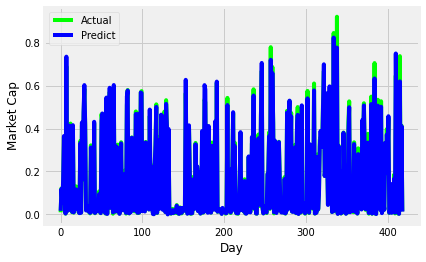

In [ ]:
plt.plot(y_test, color= 'lime')
plt.plot(predicted, color='blue')
plt.title("")
plt.xlabel("Day")
plt.ylabel("Market Cap")
plt.legend(['Actual','Predict'], loc='upper left')
plt.show()